In [1]:
import pandas as pd

In [3]:
bank_df = pd.read_csv('bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [6]:
X_features = list(bank_df.columns)
X_features.remove("subscribed")
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [7]:
encoded_bank_df = pd.get_dummies(bank_df[X_features],drop_first= True)

In [9]:
Y = bank_df.subscribed.map(lambda x: int(x == 'yes'))
X = encoded_bank_df

In [12]:
Y.value_counts('subcribed')

0    0.88476
1    0.11524
Name: subscribed, dtype: float64

In [16]:
import statsmodels.api as sm
logit_model = sm.Logit(Y, sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.335572
         Iterations 7


In [17]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.061     
Dependent Variable:   subscribed       AIC:              3082.2384 
Date:                 2025-05-23 10:11 BIC:              3236.2341 
No. Observations:     4521             Log-Likelihood:   -1517.1   
Df Model:             23               LL-Null:          -1615.5   
Df Residuals:         4497             LLR p-value:      1.4866e-29
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.7573   0.3799 -4.6251 0.0000 -2.5019 -1.0126
age                  0.0078   0.0058  1.3395 0.1804 -0.0036  0.0191
balance             -0.0000   0.0000 -0.2236 0.8231 -0.0000  0.0000
current-campaign    -0.0905   0.0238 -3.8042 0.0001 -0.1371 -0.0439
previous-campaign    0.1414   0.0212  6.6569 0.0000  0.0998  0.1830
job_blue-collar     -0.3412   0.2000 -1.7060 0.0880 -0.7331  0.0508
job_entrepreneur    -0.2900   0.3161 -0.9175 0.3589 -0.9096  0.3295
job_housemaid       -0.0166   0.3339 -0.0497 0.9603 -0.6711  0.6379
job_management      -0.0487   0.1984 -0.2455 0.8061 -0.4375  0.3401
job_retired          0.5454   0.2503  2.1794 0.0293  0.0549  1.0360
job_self-employed   -0.2234   0.2895 -0.7715 0.4404 -0.7909  0.3441
job_services        -0.2248   0.2245 -1.0012 0.3167 -0.6648  0.2152
job_student          0.3888   0.3181  1.2223 0.2216 -0.2346  1.0122
job_technician      -0.2101   0.1874 -1.1213 0.2622 -0.5773  0.1571
job_unemployed      -0.3723   0.3336 -1.1162 0.2643 -1.0261  0.2815
job_unknown          0.3193   0.4620  0.6913 0.4894 -0.5861  1.2248
marital_married     -0.4012   0.1440 -2.7857 0.0053 -0.6835 -0.1189
marital_single      -0.0463   0.1676 -0.2763 0.7823 -0.3749  0.2822
education_secondary  0.2128   0.1680  1.2670 0.2052 -0.1164  0.5420
education_tertiary   0.3891   0.1935  2.0103 0.0444  0.0098  0.7684
education_unknown   -0.1956   0.2927 -0.6682 0.5040 -0.7693  0.3781
default_yes          0.2286   0.3670  0.6228 0.5334 -0.4908  0.9479
housing-loan_yes    -0.5355   0.1024 -5.2273 0.0000 -0.7362 -0.3347
personal-loan_yes   -0.7139   0.1689 -4.2268 0.0000 -1.0449 -0.3829
===================================================================

"""

In [19]:
def get_significant(lm):
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list(var_p_vals_df[var_p_vals_df.pvals<= 0.05]['vars'])

In [22]:
significant_vars = get_significant(logit_model)
significant_vars

['const',
 'current-campaign',
 'previous-campaign',
 'job_retired',
 'marital_married',
 'education_tertiary',
 'housing-loan_yes',
 'personal-loan_yes']

In [31]:
X_features = [
 'current-campaign',
 'previous-campaign',
 'job_retired',
 'marital_married',
 'education_tertiary',
 'housing-loan_yes',
 'personal-loan_yes']

In [34]:
logit_model2 = sm.Logit(Y,sm.add_constant(X[X_features])).fit()

Optimization terminated successfully.
         Current function value: 0.337228
         Iterations 7


In [38]:
y_pred_df = pd.DataFrame({'actual' : Y,
                         'predicted_prob': logit_model2.predict(sm.add_constant(X[X_features]))})
y_pred_df

,actual,predicted_prob
0,0,0.125484
1,0,0.065379
2,0,0.153527
3,0,0.039308
4,0,0.074130
...,...,...
4516,0,0.053042
4517,0,0.050772
4518,0,0.055482
4519,0,0.143832


In [40]:
sorted_predict_df = y_pred_df[['predicted_prob','actual']].sort_values('predicted_prob',ascending = False)
sorted_predict_df

,predicted_prob,actual
3682,0.864769,0
97,0.828031,0
3426,0.706809,0
1312,0.642337,1
3930,0.631032,1
...,...,...
298,0.005058,1
3125,0.004998,0
1363,0.003996,0
4301,0.001717,0


In [42]:
num_per_decile =  int(len(sorted_predict_df)/10)  #decile is divided into 10 equal parts
print("Number of observations per decile:", num_per_decile)
#predicted probability of a positive class. So, decile 1 contains the top 10% of predictions with the highest scores, decile 2 the next 10%, and so on.

Number of observations per decile: 452


In [46]:
def get_decile(df):
    df['decile'] = 1
    idx = 0
    for each_d in range(0,10):
        df.iloc[idx:idx + num_per_decile,df.columns.get_loc('decile')] = each_d
        idx += num_per_decile
    df['decile'] = df['decile'] + 1
    return df

In [50]:
deciles_predict_df = get_decile(sorted_predict_df)
deciles_predict_df.sort_values('decile', ascending = True)

,predicted_prob,actual,decile
3682,0.864769,0,1
608,0.220004,0,1
2448,0.220004,0,1
2600,0.220004,0,1
57,0.220004,0,1
...,...,...,...
580,0.042823,0,10
267,0.042823,0,10
1204,0.042823,0,10
2052,0.039930,0,10


In [54]:
#calculating Gain
gain_lift_df = pd.DataFrame(deciles_predict_df.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df.columns = ['decile','gain']
gain_lift_df

,decile,gain
0,1,125
1,2,83
2,3,73
3,4,53
4,5,31
5,6,46
6,7,37
7,8,28
8,9,25
9,10,20


In [57]:
gain_lift_df['gain_percentage'] = (100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())
gain_lift_df

,decile,gain,gain_percentage
0,1,125,23.992322
1,2,83,39.923225
2,3,73,53.934741
3,4,53,64.107486
4,5,31,70.057582
5,6,46,78.886756
6,7,37,85.988484
7,8,28,91.362764
8,9,25,96.161228
9,10,20,100.000000


In [58]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

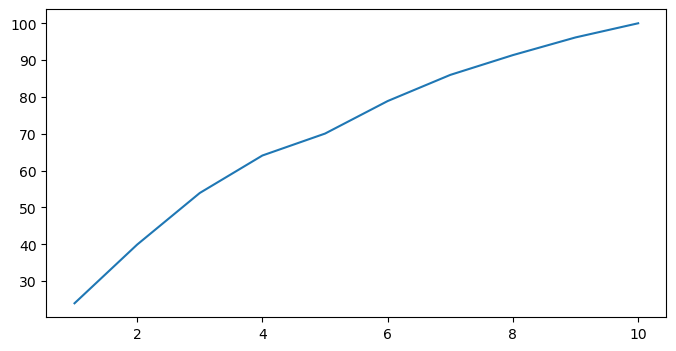

In [59]:
plt.figure(figsize = (8,4))
plt.plot(gain_lift_df['decile'],
        gain_lift_df['gain_percentage'],'-')
plt.show()

In [60]:
#calculating Lift
#Lift can be calculated by dividing gain percentage by the decile number.
gain_lift_df['lift'] = (gain_lift_df.gain_percentage/(gain_lift_df.decile * 10))
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,125,23.992322,2.399232
1,2,83,39.923225,1.996161
2,3,73,53.934741,1.797825
3,4,53,64.107486,1.602687
4,5,31,70.057582,1.401152
5,6,46,78.886756,1.314779
6,7,37,85.988484,1.228407
7,8,28,91.362764,1.142035
8,9,25,96.161228,1.068458
9,10,20,100.000000,1.000000


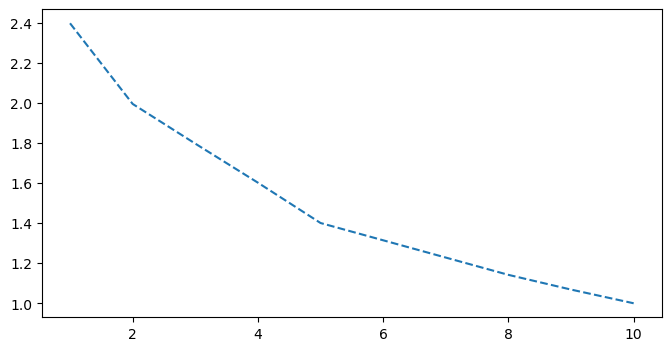

In [62]:
plt.figure(figsize = (8,4))
plt.plot(gain_lift_df['decile'], gain_lift_df['lift'],'--')
plt.show()